# SQLAlchemy Homework 

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import style

style.use("fivethirtyeight")
import matplotlib.pyplot as plt
from pprint import pprint
import datetime

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import statistics as stat

<IPython.core.display.Javascript object>

In [4]:
import datetime as dt

<IPython.core.display.Javascript object>

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct, desc
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import and_, or_

<IPython.core.display.Javascript object>

In [6]:
class DictMixIn:
    def to_dict(self):
        return {
            column.name: getattr(self, column.name)
            if not isinstance(getattr(self, column.name), datetime.datetime)
            else getattr(self, column.name).isoformat()
            for column in self.__table__.columns
        }

<IPython.core.display.Javascript object>

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

<IPython.core.display.Javascript object>

In [8]:
# Create a Base class using declarative
Base = declarative_base()

<IPython.core.display.Javascript object>

In [9]:
# Create our session ans associate it with engine
session = Session(engine)

<IPython.core.display.Javascript object>

# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [10]:
# The below code is used to check table names, it's column names and data type
inspector = inspect(engine)
table_names = inspector.get_table_names()
for table in table_names:
    print(table + ":")
    columns = inspector.get_columns(table)
    pprint([[column["name"], column["type"]] for column in columns])


# create a Measurement and Station classes and map to tables measurement and station respectively
class Measurement(Base, DictMixIn):
    __tablename__ = "measurement"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(String)
    prcp = Column(Float)
    tobs = Column(Float)


class Station(Base, DictMixIn):
    __tablename__ = "station"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

measurement:
[['id', INTEGER()],
 ['station', TEXT()],
 ['date', TEXT()],
 ['prcp', FLOAT()],
 ['tobs', FLOAT()]]
station:
[['id', INTEGER()],
 ['station', TEXT()],
 ['name', TEXT()],
 ['latitude', FLOAT()],
 ['longitude', FLOAT()],
 ['elevation', FLOAT()]]


<IPython.core.display.Javascript object>

In [11]:
# A query to determin the maximum date in the data set
max_date = session.query(func.max(Measurement.date)).all()
max_date = [date[0] for date in max_date][0]
print(max_date)

# A query to retrieve last 12 months data from the data set
cmd = session.query(Measurement).filter(
    and_(
        Measurement.date > datetime.datetime(2016, 8, 23),
        Measurement.date <= datetime.datetime(2017, 8, 23),
    )
)

Precipitations = cmd.all()
df_Measurement = pd.DataFrame([Precip.to_dict() for Precip in Precipitations])
df_Measurement.head()

2017-08-23


,date,id,prcp,station,tobs
0,2016-08-24,2365,0.08,USC00519397,79.0
1,2016-08-25,2366,0.08,USC00519397,80.0
2,2016-08-26,2367,0.00,USC00519397,79.0
3,2016-08-27,2368,0.00,USC00519397,77.0
4,2016-08-28,2369,0.01,USC00519397,78.0


<IPython.core.display.Javascript object>

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = df_Measurement[["date", "prcp"]]
df = df.set_index("date")
df.sort_index(inplace=True)
summary = pd.Series(df["prcp"])
summary.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
# Design a query to show how many stations are available in this dataset?
no_of_stations = session.query(func.count(distinct(Station.station))).all()
no_of_stations = [n[0] for n in no_of_stations][0]
print(f"Number of Stations = {no_of_stations}")

Number of Stations = 9


<IPython.core.display.Javascript object>

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

cmd = (
    session.query(Measurement.station, Station.name, func.count(Measurement.station))
    .filter(Measurement.station == Station.station)
    .group_by(Measurement.station)
    .order_by(desc(func.count(Measurement.station)))
)
items = cmd.all()
print("List of stations and the counts in descending order")
pprint(items)

List of stations and the counts in descending order
[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]


<IPython.core.display.Javascript object>

In [15]:
# Find the station with max number of rows
Most_Active_Station = max(items, key=lambda x: x[2])
print(f"Most Active Station is {Most_Active_Station}")

Most Active Station is ('USC00519281', 'WAIHEE 837.5, HI US', 2772)


<IPython.core.display.Javascript object>

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
cmd = session.query(Measurement)\
      .filter(
        and_(
            Measurement.station == 'USC00519281',
            Measurement.date > datetime.datetime(2016,8,23),
            Measurement.date <= datetime.datetime(2017,8,23),           
        )\
  )
items = cmd.all()
df_temperature_active_station = pd.DataFrame([item.to_dict() for item in items])
df_temperature_active_station.head()
print("Below is the statistics of Most active station")
print(f"Minimum temperature : {df_temperature_active_station['tobs'].min()}")
print(f"Maximum temperature : {df_temperature_active_station['tobs'].max()}")
print(f"Minimum temperature : {round(df_temperature_active_station['tobs'].mean(), 2)}")


Below is the statistics of Most active station
Minimum temperature : 59.0
Maximum temperature : 83.0
Minimum temperature : 73.1


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Histogram of Average Temperatures for last 12 months')

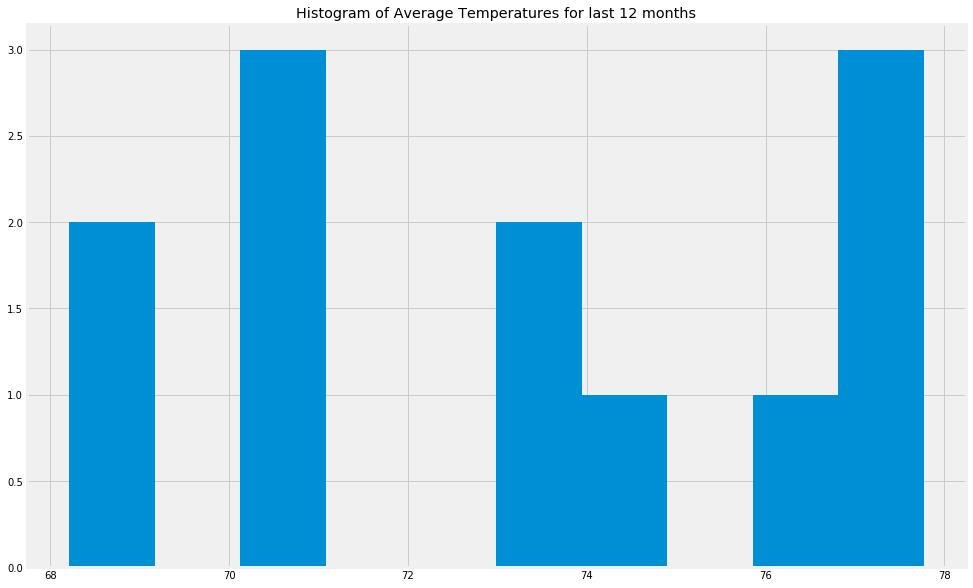

<IPython.core.display.Javascript object>

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Step1:
# Below code adds a column 'month' to the dataframe of most active station.
df_temperature_active_station["month"] = pd.DatetimeIndex(
    df_temperature_active_station["date"]
).month
df_temperature_active_station = df_temperature_active_station.sort_values(by=["month"])

# Step2:
month_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
group_names = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
df_temperature_active_station.head()
bins = pd.cut(df_temperature_active_station["month"], month_bins, labels=group_names)
Temp_by_bin = df_temperature_active_station.groupby(bins)["tobs"].mean()
s = pd.Series(Temp_by_bin)
s.hist()
plt.title("Histogram of Average Temperatures for last 12 months")

Text(0.5, 1.0, 'Month-wise Average Temperatures ')

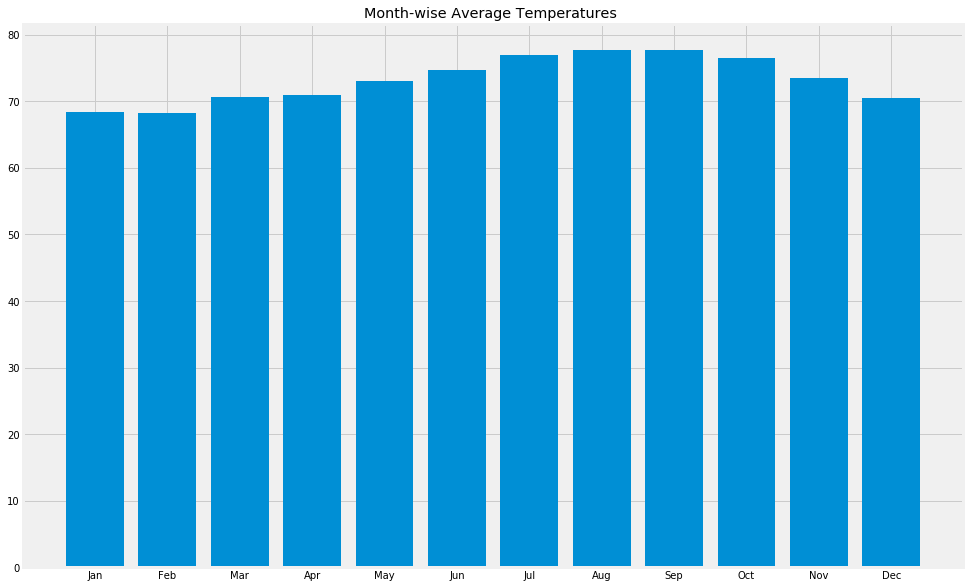

<IPython.core.display.Javascript object>

In [36]:
plt.bar(s.index, s.values)
plt.title("Month-wise Average Temperatures ")

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    return (
        session.query(
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs),
            func.max(Measurement.tobs),
        )
        .filter(Measurement.date >= start_date)
        .filter(Measurement.date <= end_date)
        .all()
    )


# function usage example
print(calc_temps("2012-02-28", "2012-03-05"))

[(62.0, 69.57142857142857, 74.0)]


<IPython.core.display.Javascript object>

In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax
# for your trip using the previous year's data for those same dates.
# Trip dates From 23rd December to 2nd January
stats_temp = calc_temps("2016-12-23", "2017-1-2")
list_stat = [[temp[0], temp[1], temp[2]] for temp in stats_temp][0]
tmin = list_stat[0]
tavg = list_stat[1]
tmax = list_stat[2]
print(f"Tmin = {tmin}, Tavg = {tavg}, Tmax = {tmax}")

Tmin = 58.0, Tavg = 74.05024088093599, Tmax = 87.0


<IPython.core.display.Javascript object>

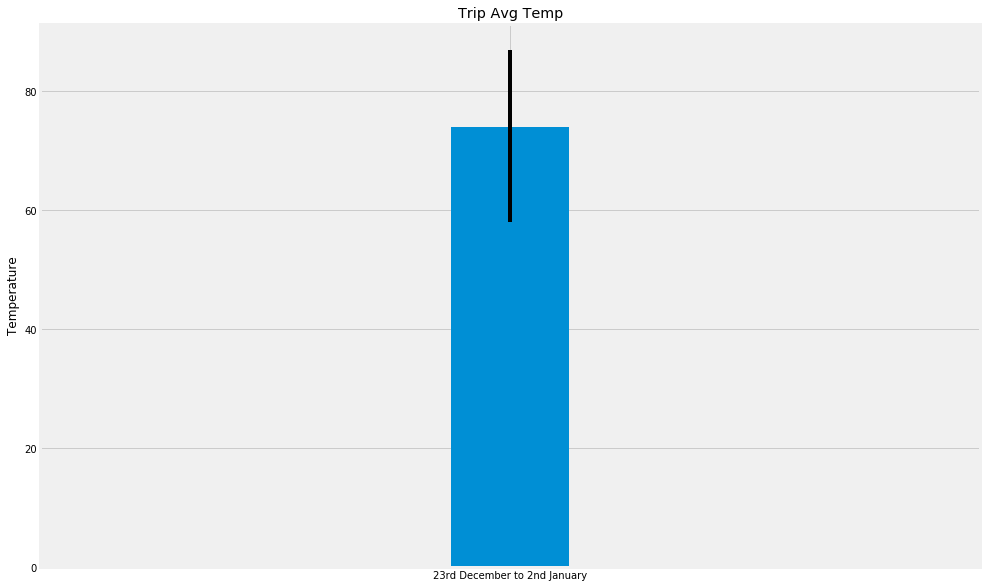

<IPython.core.display.Javascript object>

In [31]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower_error = tavg - tmin
upper_error = tmax - tavg
asymmetric_error = np.transpose([[lower_error, upper_error]])

plt.bar("23rd December to 2nd January", list_stat[1], width=0.5, yerr=asymmetric_error)
plt.title("Trip Avg Temp")
plt.xlim([-2, 2])
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Trip dates From 23rd December to 2nd January

cmd = (
    session.query(
        func.sum(Measurement.prcp),
        Measurement.station,
        Station.name,
        Station.latitude,
        Station.longitude,
        Station.elevation,
    )
    .filter(Measurement.station == Station.station)
    .filter(
        and_(
            Measurement.date > datetime.datetime(2016, 12, 23),
            Measurement.date <= datetime.datetime(2017, 1, 2),
        )
    )
    .group_by(Measurement.station)
    .order_by(desc(func.sum(Measurement.prcp)))
)

items = cmd.all()

df_rainfall = pd.DataFrame(
    [
        {
            "Total prcp": item[0],
            "Station": item[1],
            "Name": item[2],
            "Latitude": item[3],
            "Longitude": item[4],
            "Elevation": item[5],
        }
        for item in items
    ]
)
df_rainfall.head()

,Elevation,Latitude,Longitude,Name,Station,Total prcp
0,152.4,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",USC00516128,7.55
1,14.6,21.42340,-157.80150,"KANEOHE 838.1, HI US",USC00513117,1.85
2,32.9,21.45167,-157.84889,"WAIHEE 837.5, HI US",USC00519281,1.68
3,7.0,21.52130,-157.83740,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,1.38
4,19.5,21.33556,-157.71139,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,0.30


<IPython.core.display.Javascript object>

## Optional Challenge Assignment

In [33]:
# Create a query that will calculate the daily normals
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """

    sel = [
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs),
    ]
    return (
        session.query(*sel)
        .filter(func.strftime("%m-%d", Measurement.date) == date)
        .all()
    )


daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

<IPython.core.display.Javascript object>

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
# Use the start and end date to create a range of dates
Trip_start_date = datetime.date(2016, 12, 23)
dateList = []
for x in range(0, 7):
     dateList.append(Trip_start_date  + datetime.timedelta(days=x))

# Stip off the year and save a list of %m-%d strings
dateList_month_day = []
for date in dateList:
    dateList_month_day.append(f"{date.month}-{date.day}")

# Loop through the list of %m-%d strings and calculate the normals for each date
df_daily_normal = pd.DataFrame([daily_normals(item)[0]  for item in dateList_month_day], columns = ["tmin", "tavg", "tmax"])

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_daily_normal["date"]=dateList
df_daily_normal.set_index("date", inplace = True)
df_daily_normal.head()


,tmin,tavg,tmax
date,,,
2016-12-23,61.0,70.346939,78.0
2016-12-24,62.0,70.062500,78.0
2016-12-25,60.0,71.750000,79.0
2016-12-26,63.0,71.446809,77.0
2016-12-27,62.0,71.916667,79.0


<IPython.core.display.Javascript object>

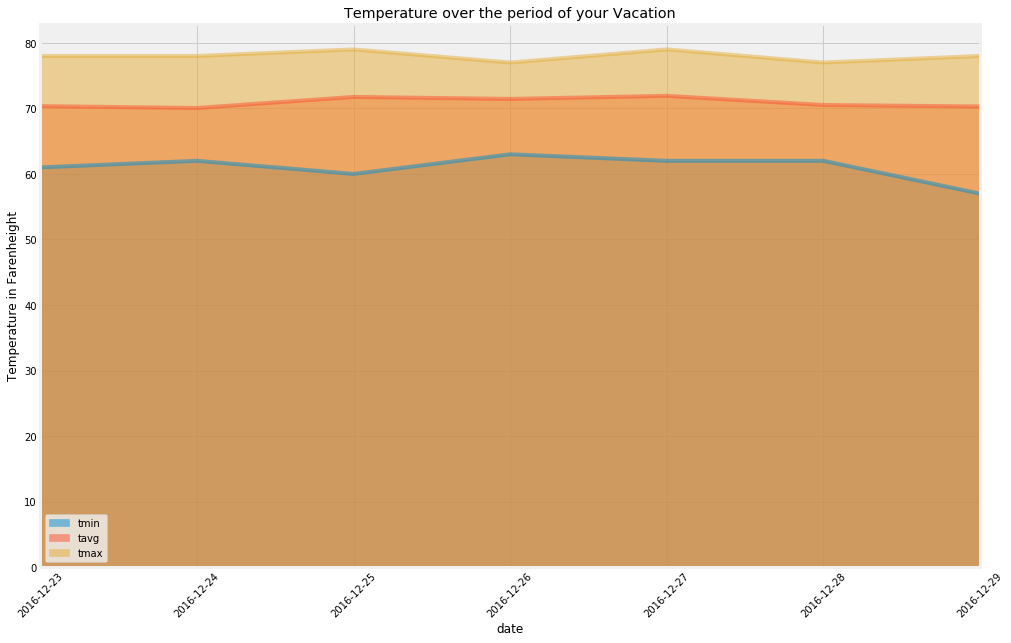

<IPython.core.display.Javascript object>

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
ax=df_daily_normal.plot.area(stacked=False, rot = 45)
plt.ylabel('Temperature in Farenheight')
plt.title('Temperature over the period of your Vacation')
figsize_width = 15
figsize_height =10
mpl.rcParams["figure.figsize"]= figsize_width, figsize_height
